In [1]:
import pandas as pd
import matplotlib.pyplot as plt

      month  Count
0   2024-07      5
1   2024-08      9
2   2024-09     17
3   2024-10      6
4   2024-11     12
5   2024-12     14
6   2025-01     14
7   2025-02      6
8   2025-03      8
9   2025-04     11
10  2025-05     22
11  2025-06     12
12  2025-07     33


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/1895862237.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


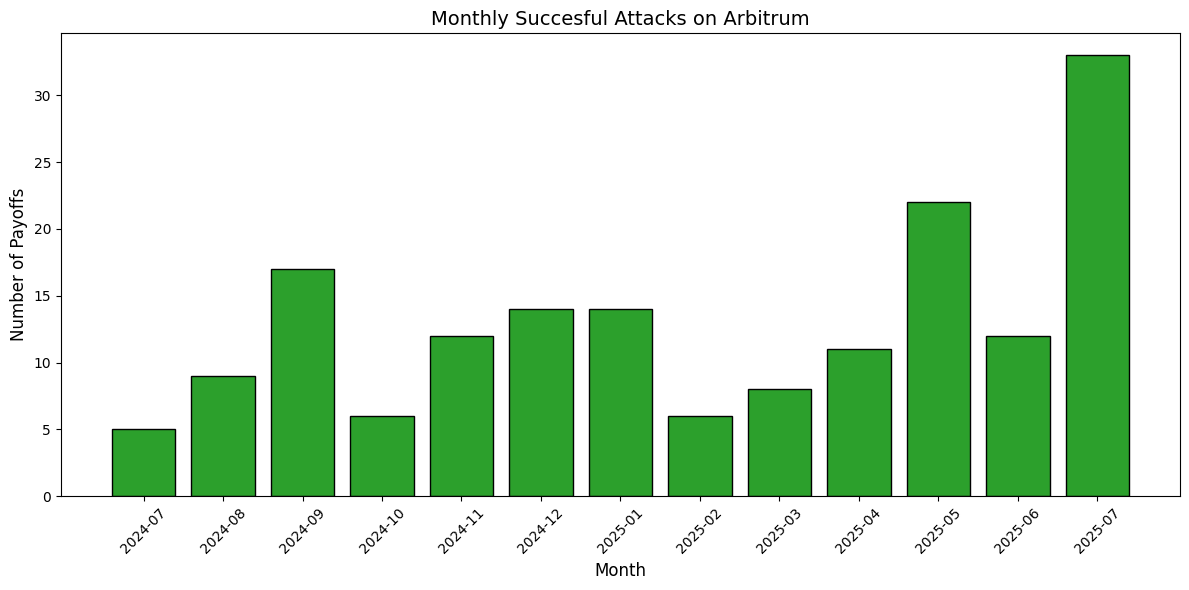

In [7]:
# 1. Configuration
file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/arbitrum_payoffs.csv'

# 2. Load the Data
df = pd.read_csv(file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#2ca02c', edgecolor='black')

plt.title('Monthly Succesful Attacks on Arbitrum', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

      month  Count
0   2024-07     20
1   2024-08     28
2   2024-09     28
3   2024-10      7
4   2024-11     13
5   2024-12      1
6   2025-01      7
7   2025-02     10
8   2025-03     56
9   2025-04     51
10  2025-05     57
11  2025-06     45
12  2025-07     23


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/4275676924.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


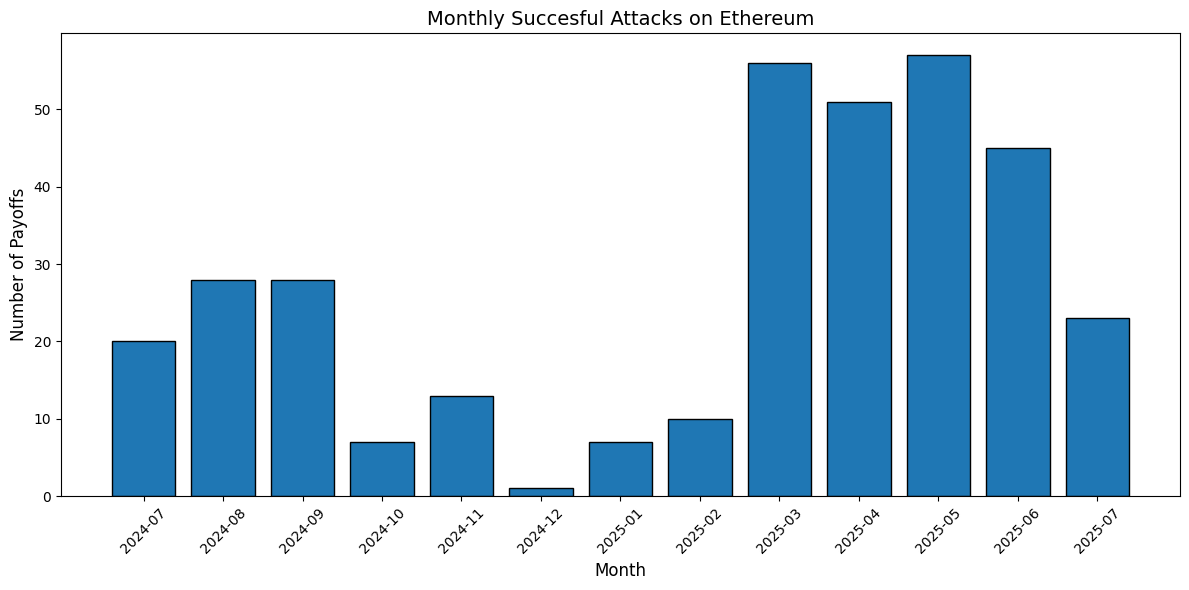

In [8]:
# 1. Configuration
file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/eth_confirmed_payouts_2024_07_to_2025_06.csv'

# 2. Load the Data
df = pd.read_csv(file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#1f77b4', edgecolor='black')

plt.title('Monthly Succesful Attacks on Ethereum', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

      month  Count
0   2024-07      2
1   2024-10      2
2   2024-11      1
3   2024-12      6
4   2025-01      2
5   2025-02      5
6   2025-03      2
7   2025-04      2
8   2025-05      3
9   2025-06      5
10  2025-07      1


/var/folders/1p/z01wly996kqgbn5g072fv5pw0000gn/T/ipykernel_5086/2022241969.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['payoff_ts'].dt.to_period('M')


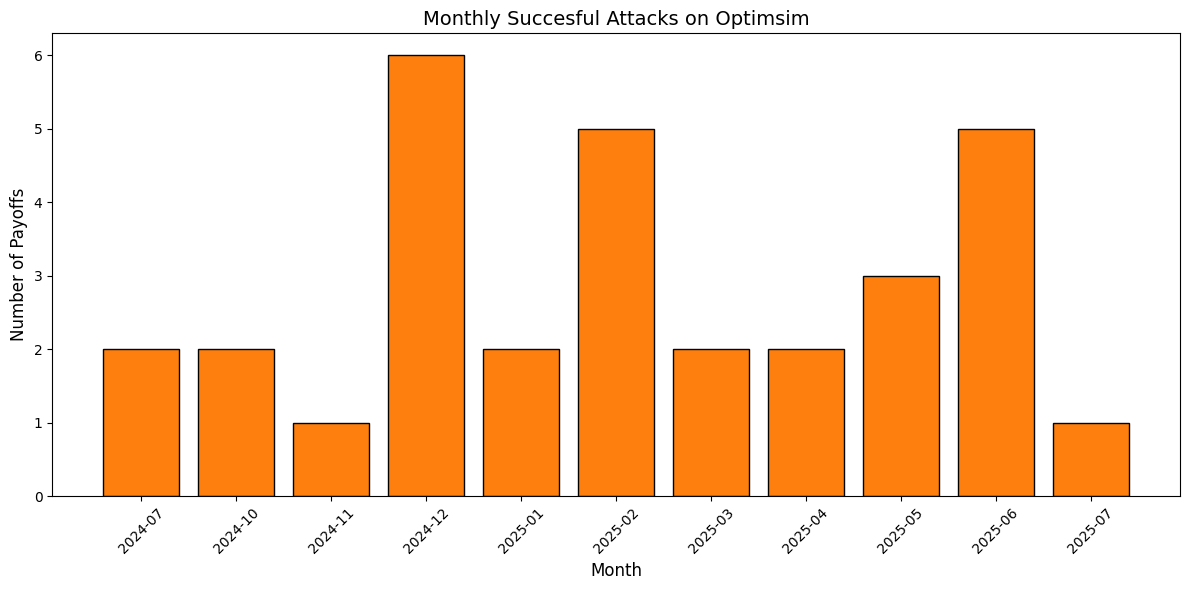

In [10]:
# 1. Configuration
file_path = '/Users/vlad/Downloads/GitHub/ethereum-poisoning-detector/data/optimism_payouts.csv'

# 2. Load the Data
df = pd.read_csv(file_path)

# 3. Process the Timestamp
# Converts the string timestamp to a datetime object
df['payoff_ts'] = pd.to_datetime(df['payoff_ts'])

# Create a "Month" period column (e.g., "2024-07")
df['month'] = df['payoff_ts'].dt.to_period('M')

# 4. Group by Month and Count
monthly_counts = df.groupby('month').size().reset_index(name='Count')

# Convert Period object to String for cleaner plotting
monthly_counts['month'] = monthly_counts['month'].astype(str)

# Ensure it's sorted chronologically
monthly_counts = monthly_counts.sort_values('month')

# Display the Table
print(monthly_counts)

# 5. Plot the Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month'], monthly_counts['Count'], color='#ff7f0e', edgecolor='black')

plt.title('Monthly Succesful Attacks on Optimsim', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Payoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()